# PandasとPanel dataとpivot table
## 目的

- pivot_tableをpanel data処理に応用する

## Import

In [1]:
import pandas as pd
import numpy as np
import gc

## 設定

In [2]:
pd.set_option('display.max_columns', 6)
pd.options.display.float_format = '{:,.2f}'.format

## a dataset from the OECD of real minimum wages in 32 countries

In [3]:
url1 = 'https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv'
df = pd.read_csv(url1)
df.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 6 columns):
Unnamed: 0    1408 non-null int64
Time          1408 non-null object
Country       1408 non-null object
Series        1408 non-null object
Pay period    1408 non-null object
value         1340 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 66.1+ KB


data期間の確認

In [5]:
sorted(df['Time'].unique())

['2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01']

国の確認

In [6]:
sorted(df['Country'].unique())

['Australia',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Estonia',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Israel',
 'Japan',
 'Korea',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Poland',
 'Portugal',
 'Russian Federation',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Turkey',
 'United Kingdom',
 'United States']

In [7]:
sorted(df['Series'].unique())

['In 2015 constant prices at 2015 USD PPPs',
 'In 2015 constant prices at 2015 USD exchange rates']

In [8]:
sorted(df['Pay period'].unique())

['Annual', 'Hourly']

### Multiindexを用いてdata整形

Indexの参照順番は`Time > Country > Series > Pay period`

In [9]:
realwage = df.pivot_table(values='value',
                                index='Time',
                                columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...  \
Series     In 2015 constant prices at 2015 USD exchange rates  ...   
Pay period                                             Annual  ...   
Time                                                           ...   
2006-01-01                                          23,826.64  ...   
2007-01-01                                          24,616.84  ...   
2008-01-01                                          24,185.70  ...   
2009-01-01                                          24,496.84  ...   
2010-01-01                                          24,373.76  ...   

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

panel dataとして扱うため、timeをdatetime型に変換する

In [10]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

In [12]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

### `.stack()`と`unstack()`

`.stack()` Multiindex columnのlowest levelをrowに移動させるmethod. `unstack()`は逆。

In [13]:
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  ...  \
Series                In 2015 constant prices at 2015 USD PPPs  ...   
Time       Pay period                                           ...   
2006-01-01 Annual                                    21,042.28  ...   
           Hourly                                        10.09  ...   
2007-01-01 Annual                                    21,310.05  ...   
           Hourly                                        10.22  ...   
2008-01-01 Annual                                    21,416.96  ...   

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                              14,097.56  

[5 rows x 64 columns]

levelを指定することもできる

In [14]:
realwage.stack(level='Country').head()

Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

indexの番号でも指定できる

In [15]:
realwage['2015'].stack(level=(1, 2)).head()

Country                                                                   Australia  \
Time       Series                                             Pay period              
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      21,715.53   
                                                              Hourly          10.99   
           In 2015 constant prices at 2015 USD exchange rates Annual      25,349.90   
                                                              Hourly          12.83   

Country                                                                    Belgium  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     21,588.12   
                                                              Hourly         10.35   
           In 2015 constant prices at 2015 USD exchange rates Annual     20,753.48   
                                                              Hourly          9.95   

Country                                                                    Brazil  \
Time       Series                                             Pay period            
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     4,628.63   
                                                              Hourly         2.00   
           In 2015 constant prices at 2015 USD exchange rates Annual     2,842.28   
                                                              Hourly         1.21   

Country                                                                   ...  \
Time       Series                                             Pay period  ...   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      ...   
                                                              Hourly      ...   
           In 2015 constant prices at 2015 USD exchange rates Annual      ...   
                                                              Hourly      ...   

Country                                                                     Turkey  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     10,062.42   
                                                              Hourly          4.82   
           In 2015 constant prices at 2015 USD exchange rates Annual      5,618.36   
                                                              Hourly          2.69   

Country                                                                   United Kingdom  \
Time       Series                                             Pay period                   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual           17,125.45   
                                                              Hourly                8.23   
           In 2015 constant prices at 2015 USD exchange rates Annual           20,814.46   
                                                              Hourly               10.01   

Country                                                                   United States  
Time       Series                                             Pay period                 
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual          15,080.00  
                                                              Hourly               7.25  
           In 2015 constant prices at 2015 USD exchange rates Annual          15,080.00  
                                                              Hourly               7.25  

[4 rows x 32 columns]

In [16]:
realwage['2015'].stack(level=(1, 2)).transpose().head()

Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

### cross section dataの抽出

In [17]:
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...  \
Series     In 2015 constant prices at 2015 USD exchange rates  ...   
Pay period                                             Annual  ...   
Time                                                           ...   
2006-01-01                                          23,826.64  ...   
2007-01-01                                          24,616.84  ...   
2008-01-01                                          24,185.70  ...   
2009-01-01                                          24,496.84  ...   
2010-01-01                                          24,373.76  ...   

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [18]:
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


## Merging Dataframes and Filling NaNs:  country information from WorldData.info

In [19]:
url2 = 'https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/countries.csv'

In [20]:
worlddata = pd.read_csv(url2, sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [21]:
worlddata.columns

Index(['Country (en)', 'Country (de)', 'Country (local)', 'Country code',
       'Continent', 'Capital', 'Population', 'Area', 'Coastline',
       'Government form', 'Currency', 'Currency code', 'Dialing prefix',
       'Birthrate', 'Deathrate', 'Life expectancy', 'Url'],
      dtype='object')

In [22]:
worlddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 17 columns):
Country (en)       248 non-null object
Country (de)       248 non-null object
Country (local)    245 non-null object
Country code       247 non-null object
Continent          248 non-null object
Capital            0 non-null float64
Population         248 non-null int64
Area               248 non-null int64
Coastline          248 non-null int64
Government form    248 non-null object
Currency           247 non-null object
Currency code      247 non-null object
Dialing prefix     243 non-null object
Birthrate          248 non-null float64
Deathrate          248 non-null float64
Life expectancy    248 non-null float64
Url                248 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 33.1+ KB


In [23]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


worlddataとrealwage_fのmerge

In [24]:
realwage_f.transpose().head()

Time,2006-01-01,2007-01-01,2008-01-01,...,2014-01-01,2015-01-01,2016-01-01
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


leftはindex-base, rightは`Country` columnでmergeする

In [25]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged = merged.reset_index(drop = True)
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
0,12.06,12.46,12.24,...,12.98,Australia,Australia
1,9.70,9.82,9.87,...,9.76,Belgium,Europe
2,0.87,0.92,0.96,...,1.24,Brazil,South America
3,6.89,6.96,7.24,...,8.48,Canada,North America
4,1.42,1.45,1.44,...,1.91,Chile,South America


NaNの確認

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
2006-01-01 00:00:00    30 non-null float64
2007-01-01 00:00:00    30 non-null float64
2008-01-01 00:00:00    30 non-null float64
2009-01-01 00:00:00    30 non-null float64
2010-01-01 00:00:00    30 non-null float64
2011-01-01 00:00:00    30 non-null float64
2012-01-01 00:00:00    30 non-null float64
2013-01-01 00:00:00    30 non-null float64
2014-01-01 00:00:00    31 non-null float64
2015-01-01 00:00:00    32 non-null float64
2016-01-01 00:00:00    32 non-null float64
Country                32 non-null object
Continent              29 non-null object
dtypes: float64(11), object(2)
memory usage: 3.4+ KB


NaNの存在するrowの確認

In [27]:
merged[merged['Continent'].isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
16,3.42,3.74,3.87,...,5.28,Korea,NaN
25,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
26,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


In [28]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

merged['Country'].map(missing_continents)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16      Asia
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25    Europe
26    Europe
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
Name: Country, dtype: object

fillnaを実施する

In [29]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Check for whether continents were correctly mapped

merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
16,3.42,3.74,3.87,...,5.28,Korea,Asia


America大陸がどのようなvalueで格納されているのか確認

In [30]:
merged['Continent'].unique()

array(['Australia', 'Europe', 'South America', 'North America',
       'Central America', 'Asia'], dtype=object)

In [31]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='America',
                                inplace=True)

In [32]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01  ...  2014-01-01  \
Continent Country                                         ...               
America   Brazil            0.87        0.92        0.96  ...        1.21   
          Canada            6.89        6.96        7.24  ...        8.22   
          Chile             1.42        1.45        1.44  ...        1.76   
          Colombia          1.01        1.02        1.01  ...        1.13   
          Costa Rica         nan         nan         nan  ...        2.41   

                      2015-01-01  2016-01-01  
Continent Country                             
America   Brazil            1.21        1.24  
          Canada            8.35        8.48  
          Chile             1.81        1.91  
          Colombia          1.13        1.12  
          Costa Rica        2.56        2.63  

[5 rows x 11 columns]

In [33]:
merged.columns

Index([2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00,
       2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00,
       2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00,
       2015-01-01 00:00:00, 2016-01-01 00:00:00],
      dtype='object')

data typeの変換

In [34]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [35]:
merged = merged.transpose()
merged.head()

Continent  America               ...   Europe                     
Country     Brazil Canada Chile  ... Slovenia Spain United Kingdom
Time                             ...                              
2006-01-01    0.87   6.89  1.42  ...     3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45  ...     3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44  ...     3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52  ...     4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56  ...     4.81  4.30           9.96

[5 rows x 32 columns]

## Grouping and Summarizing Data

defaultはrow-basedでaggregate functionが適用される

In [36]:
merged.mean().head(10)

Continent  Country      
America    Brazil          1.09
           Canada          7.82
           Chile           1.62
           Colombia        1.07
           Costa Rica      2.53
           Mexico          0.53
           United States   7.15
Asia       Israel          5.95
           Japan           6.18
           Korea           4.22
dtype: float64

In [37]:
merged.mean(axis = 1).head(10)

Time
2006-01-01   4.69
2007-01-01   4.84
2008-01-01   4.90
2009-01-01   5.08
2010-01-01   5.11
2011-01-01   5.08
2012-01-01   5.08
2013-01-01   5.11
2014-01-01   5.08
2015-01-01   5.33
dtype: float64

### plot

#### IMPORT

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

plot

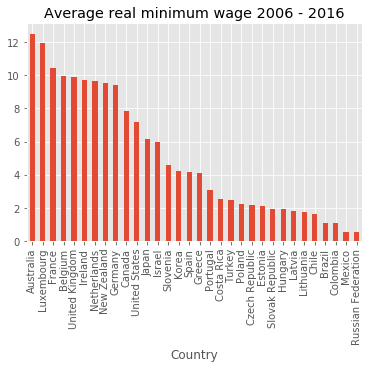

In [39]:
merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2006 - 2016")
#Set country labels
country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

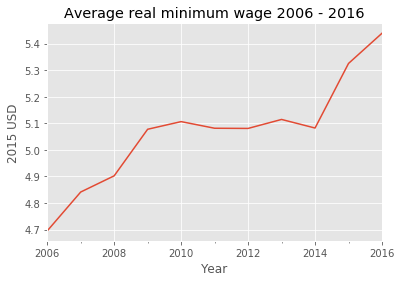

In [40]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [41]:
merged.mean(level='Continent', axis=1).head()

Continent,America,Asia,Australia,Europe
Time,,,,
2006-01-01,2.80,4.29,10.25,4.80
2007-01-01,2.85,4.44,10.73,4.94
2008-01-01,2.99,4.45,10.76,4.99
2009-01-01,3.23,4.53,10.97,5.16
2010-01-01,3.34,4.53,10.95,5.17


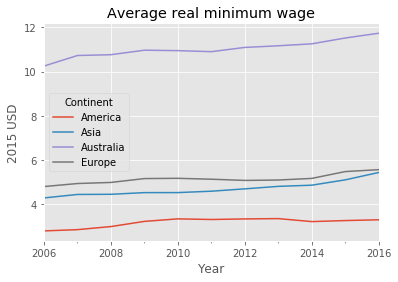

In [42]:
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

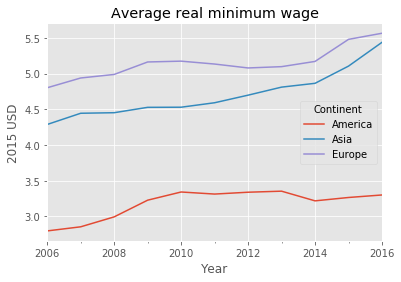

In [43]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [44]:
merged.describe()

Continent America               ...   Europe                     
Country    Brazil Canada Chile  ... Slovenia Spain United Kingdom
count       11.00  11.00 11.00  ...    11.00 11.00          11.00
mean         1.09   7.82  1.62  ...     4.60  4.16           9.92
std          0.13   0.55  0.16  ...     0.52  0.10           0.20
min          0.87   6.89  1.42  ...     3.88  3.99           9.65
25%          0.99   7.46  1.48  ...     4.02  4.10           9.74
50%          1.09   7.97  1.59  ...     4.94  4.14           9.96
75%          1.21   8.20  1.74  ...     5.00  4.21          10.06
max          1.24   8.48  1.91  ...     5.05  4.32          10.26

[8 rows x 30 columns]

In [45]:
merged.stack().describe()

Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


### groupby

Using groupby generally follows a ‘split-apply-combine’ process:

- split: data is grouped based on one or more keys
- apply: a function is called on each group independently
- combine: the results of the function calls are combined into a new data structure, `DataFrameGroupBy` object

In [46]:
grouped = merged.groupby(level='Continent', axis=1)
grouped

国数のカウント

In [47]:
grouped.size()

Continent
America     7
Asia        4
Europe     19
dtype: int64

### `get_group`の使い方

In [48]:
grouped.get_group('America').unstack()

Continent  Country        Time      
America    Brazil         2006-01-01   0.87
                          2007-01-01   0.92
                          2008-01-01   0.96
                          2009-01-01   1.03
                          2010-01-01   1.08
                                       ... 
           United States  2012-01-01   7.48
                          2013-01-01   7.38
                          2014-01-01   7.26
                          2015-01-01   7.25
                          2016-01-01   7.16
Length: 77, dtype: float64

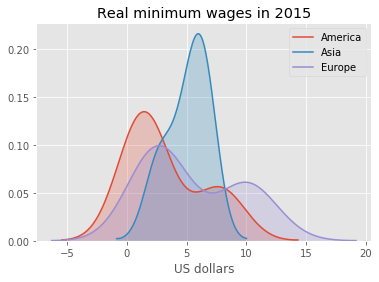

In [49]:
continents = grouped.groups.keys()

for continent in continents:
    sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()

## Eurostats

In [50]:
url3 = 'https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/employ.csv'

In [51]:
employ = pd.read_csv(url3)
employ = employ.pivot_table(values='Value',
                            index=['DATE'],
                            columns=['UNIT','AGE', 'SEX', 'INDIC_EM', 'GEO'])
employ.index = pd.to_datetime(employ.index) # ensure that dates are datetime format
employ.head()

UNIT       Percentage of total population                   ...  \
AGE                   From 15 to 24 years                   ...   
SEX                               Females                   ...   
INDIC_EM                Active population                   ...   
GEO                               Austria Belgium Bulgaria  ...   
DATE                                                        ...   
2007-01-01                          56.00   31.60    26.00  ...   
2008-01-01                          56.20   30.80    26.10  ...   
2009-01-01                          56.20   29.90    24.80  ...   
2010-01-01                          54.00   29.80    26.60  ...   
2011-01-01                          54.80   29.80    24.80  ...   

UNIT                                           Thousand persons           \
AGE                                         From 55 to 64 years            
SEX                                                       Total            
INDIC_EM   Total employment (resident population concept - LFS)            
GEO                                                 Switzerland   Turkey   
DATE                                                                       
2007-01-01                                                nan   1,282.00   
2008-01-01                                                nan   1,354.00   
2009-01-01                                                nan   1,449.00   
2010-01-01                                             640.00   1,583.00   
2011-01-01                                             661.00   1,760.00   

UNIT                       
AGE                        
SEX                        
INDIC_EM                   
GEO        United Kingdom  
DATE                       
2007-01-01       4,131.00  
2008-01-01       4,204.00  
2009-01-01       4,193.00  
2010-01-01       4,186.00  
2011-01-01       4,164.00  

[5 rows x 1440 columns]

In [52]:
employ.columns.names

FrozenList(['UNIT', 'AGE', 'SEX', 'INDIC_EM', 'GEO'])

In [53]:
employ.columns

MultiIndex([('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ('Percentage of total population', 'From 15 to 24 years', ...),
            ...
            (              'Thousand persons', 'From 55 to 64 years', ...),
            (              'Thousand persons', 'From 55 to 64 years', ...),
            (              'Thousand persons', 'From 55 to 64 years', ..

In [54]:
employ_f = employ.xs(('Percentage of total population', 'Active population'),
                     level=('UNIT', 'INDIC_EM'),
                     axis=1)
employ_f.head()

AGE        From 15 to 24 years                   ... From 55 to 64 years  \
SEX                    Females                   ...               Total   
GEO                    Austria Belgium Bulgaria  ...         Switzerland   
DATE                                             ...                       
2007-01-01               56.00   31.60    26.00  ...                 nan   
2008-01-01               56.20   30.80    26.10  ...                 nan   
2009-01-01               56.20   29.90    24.80  ...                 nan   
2010-01-01               54.00   29.80    26.60  ...               70.50   
2011-01-01               54.80   29.80    24.80  ...               71.80   

AGE                               
SEX                               
GEO        Turkey United Kingdom  
DATE                              
2007-01-01  28.10          59.30  
2008-01-01  28.70          59.80  
2009-01-01  29.90          60.30  
2010-01-01  31.10          60.00  
2011-01-01  32.80          59.70  

[5 rows x 360 columns]

In [55]:
employ_f = employ_f.drop('Total', level='SEX', axis=1)
employ_f.head()

AGE        From 15 to 24 years                   ... From 55 to 64 years  \
SEX                    Females                   ...               Males   
GEO                    Austria Belgium Bulgaria  ...         Switzerland   
DATE                                             ...                       
2007-01-01               56.00   31.60    26.00  ...                 nan   
2008-01-01               56.20   30.80    26.10  ...                 nan   
2009-01-01               56.20   29.90    24.80  ...                 nan   
2010-01-01               54.00   29.80    26.60  ...               80.50   
2011-01-01               54.80   29.80    24.80  ...               81.70   

AGE                               
SEX                               
GEO        Turkey United Kingdom  
DATE                              
2007-01-01  42.50          68.90  
2008-01-01  43.40          69.80  
2009-01-01  44.30          70.30  
2010-01-01  45.70          69.20  
2011-01-01  48.10          68.40  

[5 rows x 240 columns]

In [56]:
box = employ_f['2015'].unstack().reset_index()
box

,AGE,SEX,GEO,DATE,0
0,From 15 to 24 years,Females,Austria,2015-01-01,54.10
1,From 15 to 24 years,Females,Belgium,2015-01-01,27.10
2,From 15 to 24 years,Females,Bulgaria,2015-01-01,21.20
3,From 15 to 24 years,Females,Croatia,2015-01-01,28.00
4,From 15 to 24 years,Females,Cyprus,2015-01-01,38.90
...,...,...,...,...,...
235,From 55 to 64 years,Males,Spain,2015-01-01,66.20
236,From 55 to 64 years,Males,Sweden,2015-01-01,81.80
237,From 55 to 64 years,Males,Switzerland,2015-01-01,82.50
238,From 55 to 64 years,Males,Turkey,2015-01-01,50.30


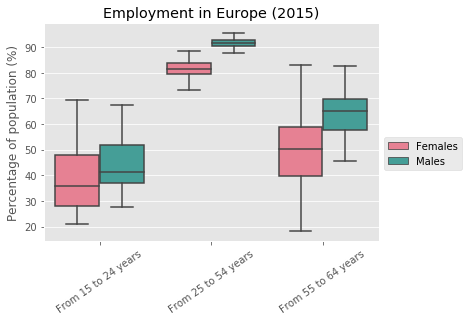

In [57]:
sns.boxplot(x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=35)
plt.ylabel('Percentage of population (%)')
plt.title('Employment in Europe (2015)')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

# Appendix
## pandas.Frozenlist

- not hashable
- immutable data 